In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\daule\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daule\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 1)Read the training data and validation data

In [21]:
train_data = pd.read_csv('train.txt', sep=";", header=None)
val_data = pd.read_csv('val.txt', sep=";", header=None)
train_data.columns, val_data.columns = ['text','emotion'],['text','emotion']

### 2)Merge these labels into two classes, i.e. Positive and Negative sentiment

In [22]:
print(val_data.emotion.unique(),val_data.emotion.unique()) # check type of emotion

['sadness' 'love' 'anger' 'joy' 'fear' 'surprise'] ['sadness' 'love' 'anger' 'joy' 'fear' 'surprise']


In [23]:
positive_sentiment = ['love','joy','surprise']
negative_sentiment = ['sadness','anger','fear']

In [24]:
train_data = train_data.replace(positive_sentiment,1)
train_data =  train_data.replace(negative_sentiment,0)
val_data = val_data.replace(positive_sentiment,1)
val_data = val_data.replace(negative_sentiment,0)
pd.DataFrame({'train_text':train_data.text,'train_emotion': train_data.emotion, 'val_text': val_data.text,'val_emotion': val_data.emotion}).head()

,train_text,train_emotion,val_text,val_emotion
0,i didnt feel humiliated,0,im feeling quite sad and sorry for myself but ...,0.0
1,i can go from feeling so hopeless to so damned...,0,i feel like i am still looking at a blank canv...,0.0
2,im grabbing a minute to post i feel greedy wrong,0,i feel like a faithful servant,1.0
3,i am ever feeling nostalgic about the fireplac...,1,i am just feeling cranky and blue,0.0
4,i am feeling grouchy,0,i can have for a treat or if i am feeling festive,1.0


### 3)Data Pre-processing

In [25]:
pd.DataFrame({'text':train_data.text,'text_length': train_data.text.str.len(), 'word_count': train_data.text.str.split(" ").str.len()}).head()

,text,text_length,word_count
0,i didnt feel humiliated,23,4
1,i can go from feeling so hopeless to so damned...,108,21
2,im grabbing a minute to post i feel greedy wrong,48,10
3,i am ever feeling nostalgic about the fireplac...,92,18
4,i am feeling grouchy,20,4


In [26]:
lmtzr = WordNetLemmatizer()

def text_preprocessing(text):
    text = str(text).lower() # lowercase
    
    text = re.sub(r'[^A-Za-z ]+', '', text) # keep only space and letters
    
    sw = stopwords.words('english')
    
    return ' '.join([lmtzr.lemmatize(word,wordnet.VERB) for word in nltk.word_tokenize(text) if word.lower() not in sw])

train_data['text'] = train_data.text.apply(text_preprocessing).copy()
val_data['text'] = val_data.text.apply(text_preprocessing).copy()
pd.DataFrame({'cleaned_text':train_data.text,'cleaned_text_length': train_data.text.str.len(), 'cleaned_text_count': train_data.text.str.split(" ").str.len()}).head()

,cleaned_text,cleaned_text_length,cleaned_text_count
0,didnt feel humiliate,20,3
1,go feel hopeless damn hopeful around someone c...,55,9
2,im grab minute post feel greedy wrong,37,7
3,ever feel nostalgic fireplace know still property,49,7
4,feel grouchy,12,2


### 4)Visualize Word Cloud

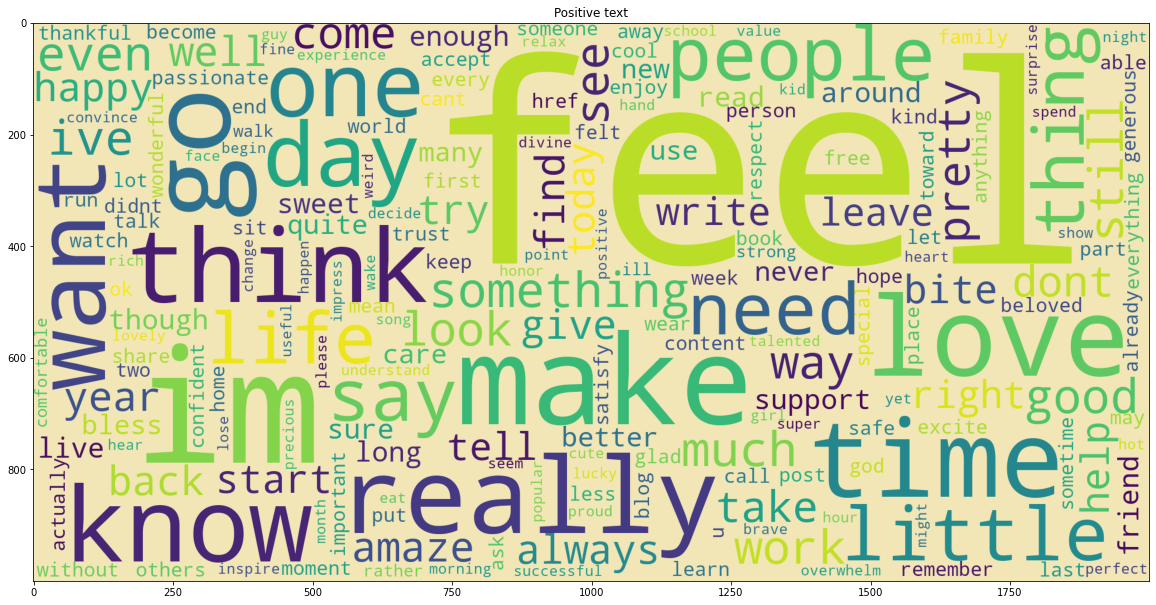

In [27]:
positive_train =train_data[train_data.emotion==1]
pos_text = " ".join([word for word in positive_train.text])
wordcloud=WordCloud(width=2000,height=1000,background_color='#F2E6B6',collocations=False).generate(pos_text)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive text")
plt.show()

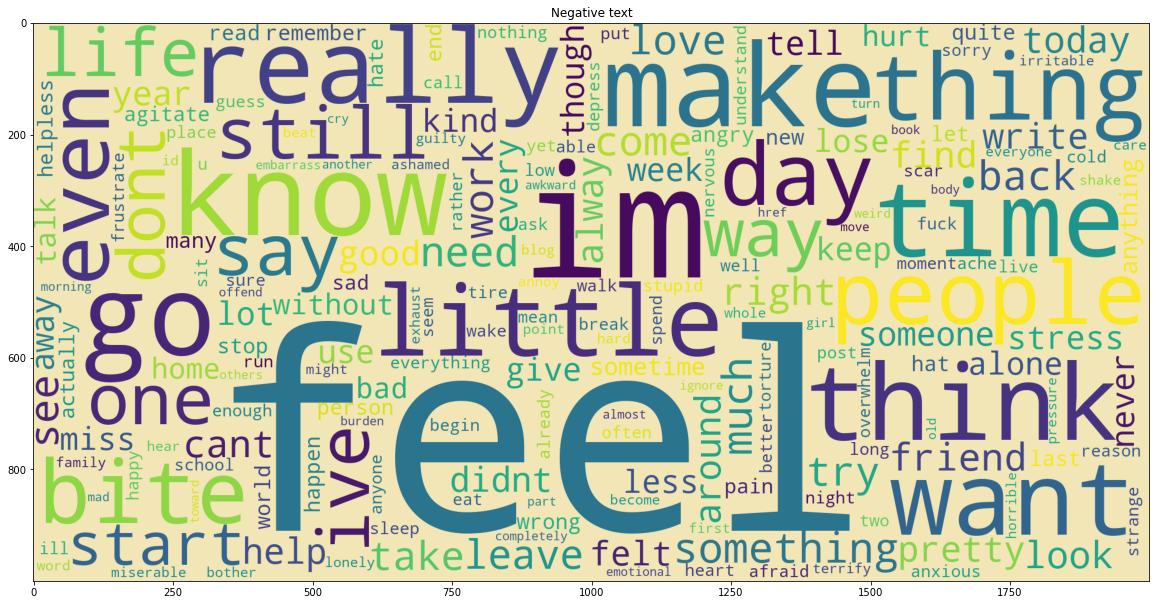

In [28]:
negative_train =train_data[train_data.emotion==0]
neg_text = " ".join([word for word in negative_train.text])
wordcloud=WordCloud(width=2000,height=1000,background_color='#F2E6B6',collocations=False).generate(neg_text)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Negative text")
plt.show()

### 5)Bag of Words

In [29]:
#####
# B #
#####
vectorizer = CountVectorizer() 
bag_of_words = vectorizer.fit_transform(train_data.text)
feature_names = vectorizer.get_feature_names()

In [30]:
pd.DataFrame(bag_of_words.toarray(),columns = feature_names)

,aa,aaaaaaand,aaaaand,aaaand,aac,aahhh,aaron,ab,abandon,abandonment,...,zombies,zone,zonisamide,zoo,zoom,zq,zucchini,zum,zumba,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#####
# A #
#####
# bags = Counter(np.concatenate(np.array([nltk.word_tokenize(word) for word in train_data.text],dtype=object), axis=0))
# bags.most_common()

### 6)Train Algorithms

In [32]:
x_train, x_test, y_train, y_test = train_data.text, val_data.text,train_data.emotion,val_data.emotion
cv=CountVectorizer()
vect=cv.fit(x_train)
x_train_vector=vect.transform(x_train)
x_test_vector=vect.transform(x_test)

In [33]:
#######################
# Logistic Regression #
#######################
model_LR = LogisticRegression(max_iter=3000)
model_LR.fit(x_train_vector, y_train)
y_predict_LR = model_LR.predict(x_test_vector)

In [34]:
##################
# Multinomial NB #
##################

model_NB = MultinomialNB()
model_NB.fit(x_train_vector, y_train)
y_predict_NB = model_NB.predict(x_test_vector)

In [35]:
###################
# Multinomial KNN #
###################
model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train_vector, y_train)
y_predict_KNN = model_KNN.predict(x_test_vector) 

In [36]:
###################
# Multinomial SVM #
###################
model_SVM = SVC()
model_SVM.fit(x_train_vector, y_train)
y_predict_SVM = model_SVM.predict(x_test_vector) 

In [37]:
###################
# Multinomial DTC #
###################
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train_vector,y_train)
y_predit_DTC = model_DTC.predict(x_test_vector) 

In [38]:
models_dataframe=pd.DataFrame({
    "Models":["Logistic Regression", "Naive Bayes" ,"K-Nearest Neighbors", "SVM algorithms","Decision-Tree Classifier"] ,
    "Accuracy":[accuracy_score(y_test,y_predict_LR),accuracy_score(y_test,y_predict_NB),accuracy_score(y_test,y_predict_KNN),accuracy_score(y_test,y_predict_SVM),accuracy_score(y_test,y_predit_DTC)]
})
models_dataframe

,Models,Accuracy
0,Logistic Regression,0.9485
1,Naive Bayes,0.9215
2,K-Nearest Neighbors,0.7775
3,SVM algorithms,0.9440
4,Decision-Tree Classifier,0.9040


### 7)Evaluate and visualize results

In [39]:
import plotly.express as px
data = px.data.gapminder()

fig = px.bar(models_dataframe, x='Models', y='Accuracy',
             hover_data=['Accuracy'], color='Accuracy', height=350)
fig.show()

In [65]:
a = text_preprocessing('I love this subject, its very hard to understand')
a = [a]
a

['love subject hard understand']

In [66]:
b = vect.transform(a)

In [67]:
model_DTC.predict(b)

array([1])